# **Importing Libraries**

In [130]:
import pandas as pd
import numpy as np

# **Loading Dataset**

In [131]:
df = pd.read_csv('oscar.csv')

In [132]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


# **Performing EDA**

In [133]:
df.shape

(506, 19)

## **Removing Unwanted Columns from Dataset**

In [134]:
x = df.pop('Marketing expense')
x = df.pop('Production expense')
x = df.pop('Multiplex coverage')
x = df.pop('Budget')
x = df.pop('Movie_length')
x = df.pop('Trailer_views')
x = df.pop('3D_available')
x = df.pop('Twitter_hastags')
x = df.pop('Avg_age_actors')
x = df.pop('Num_multiplex')
x = df.pop('Collection')

In [135]:
df.head()

,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Time_taken,Genre,Start_Tech_Oscar
0,7.825,8.095,7.910,7.995,7.94,109.60,Thriller,1
1,7.505,7.650,7.440,7.470,7.44,146.64,Drama,0
2,7.485,7.570,7.495,7.515,7.44,147.88,Comedy,1
3,6.895,7.035,6.920,7.020,8.26,185.36,Drama,1
4,6.920,7.070,6.815,7.070,8.26,176.48,Drama,1


## **Checking Null values**

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lead_ Actor_Rating   506 non-null    float64
 1   Lead_Actress_rating  506 non-null    float64
 2   Director_rating      506 non-null    float64
 3   Producer_rating      506 non-null    float64
 4   Critic_rating        506 non-null    float64
 5   Time_taken           494 non-null    float64
 6   Genre                506 non-null    object 
 7   Start_Tech_Oscar     506 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 31.8+ KB


## **Filling Null values**
Replace Null values with Mean value.

In [137]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lead_ Actor_Rating   506 non-null    float64
 1   Lead_Actress_rating  506 non-null    float64
 2   Director_rating      506 non-null    float64
 3   Producer_rating      506 non-null    float64
 4   Critic_rating        506 non-null    float64
 5   Time_taken           506 non-null    float64
 6   Genre                506 non-null    object 
 7   Start_Tech_Oscar     506 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 31.8+ KB


In [139]:
df = pd.get_dummies(df, columns = ['Genre'], drop_first = True)

In [140]:
df.head()

,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Time_taken,Start_Tech_Oscar,Genre_Comedy,Genre_Drama,Genre_Thriller
0,7.825,8.095,7.910,7.995,7.94,109.60,1,0,0,1
1,7.505,7.650,7.440,7.470,7.44,146.64,0,0,1,0
2,7.485,7.570,7.495,7.515,7.44,147.88,1,1,0,0
3,6.895,7.035,6.920,7.020,8.26,185.36,1,0,1,0
4,6.920,7.070,6.815,7.070,8.26,176.48,1,0,1,0


In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
sc = StandardScaler()

# **Define Input and Output**

In [143]:
X = df.loc[:,df.columns != 'Start_Tech_Oscar']

In [144]:
Y = df['Start_Tech_Oscar']

In [145]:
X = sc.fit_transform(X)

# **Feature Scaling**

In [146]:
X

array([[-0.17945092, -0.08603165, -0.10356891, ..., -0.66452648,
        -0.48699468,  1.32854331],
       [-0.48327998, -0.50853429, -0.54744633, ..., -0.66452648,
         2.05341054, -0.7527041 ],
       [-0.50226929, -0.58448982, -0.49550323, ...,  1.50483093,
        -0.48699468, -0.7527041 ],
       ...,
       [ 0.77476223,  0.74473197,  0.78890803, ...,  1.50483093,
        -0.48699468, -0.7527041 ],
       [ 0.67981565,  0.62605145,  0.73696493, ...,  1.50483093,
        -0.48699468, -0.7527041 ],
       [ 0.59436373,  0.659282  ,  0.62363452, ...,  1.50483093,
        -0.48699468, -0.7527041 ]])

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 10, test_size = 0.2)

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [151]:
acc_list = []
err_list = []
for i in range (1, 25):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(Y_test, y_pred)
  acc_list.append(acc)
  err_list.append(1 - acc)

In [152]:
acc_list

[0.5882352941176471,
 0.5588235294117647,
 0.6274509803921569,
 0.5686274509803921,
 0.5784313725490197,
 0.5882352941176471,
 0.5882352941176471,
 0.5784313725490197,
 0.5,
 0.5588235294117647,
 0.5588235294117647,
 0.5392156862745098,
 0.5490196078431373,
 0.5882352941176471,
 0.6078431372549019,
 0.6372549019607843,
 0.5882352941176471,
 0.5980392156862745,
 0.6078431372549019,
 0.5882352941176471,
 0.5784313725490197,
 0.5588235294117647,
 0.5294117647058824,
 0.5196078431372549]

In [153]:
err_list

[0.4117647058823529,
 0.4411764705882353,
 0.37254901960784315,
 0.43137254901960786,
 0.42156862745098034,
 0.4117647058823529,
 0.4117647058823529,
 0.42156862745098034,
 0.5,
 0.4411764705882353,
 0.4411764705882353,
 0.4607843137254902,
 0.4509803921568627,
 0.4117647058823529,
 0.3921568627450981,
 0.36274509803921573,
 0.4117647058823529,
 0.4019607843137255,
 0.3921568627450981,
 0.4117647058823529,
 0.42156862745098034,
 0.4411764705882353,
 0.47058823529411764,
 0.48039215686274506]

In [154]:
import matplotlib.pyplot as plt

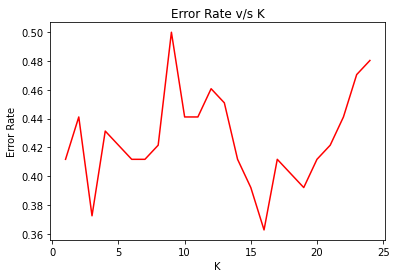

In [155]:
plt.plot(list(range(1, 25)), err_list, c = 'r')
plt.title('Error Rate v/s K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

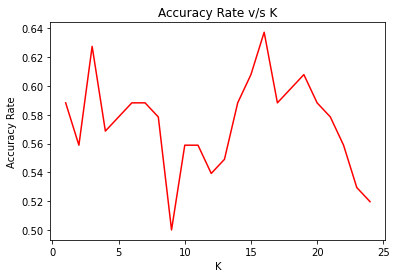

In [156]:
plt.plot(list(range(1, 25)), acc_list, c = 'r')
plt.title('Accuracy Rate v/s K')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [157]:
print("The best accuracy was with",max(acc_list),"with k=",acc_list.index(0.6372549019607843))

The best accuracy was with 0.6372549019607843 with k= 15
